 In this assignment students have to transform iris data into 3 dimensions 
and plot a 3d chart with transformed dimensions and colour each data 
point with specific class.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition



In [3]:
#iris="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=["sepal length","sepal width",
                                                                                                  "petal length","petal width","target"])

In [130]:
df=iris

In [131]:

from sklearn.preprocessing import StandardScaler
features_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


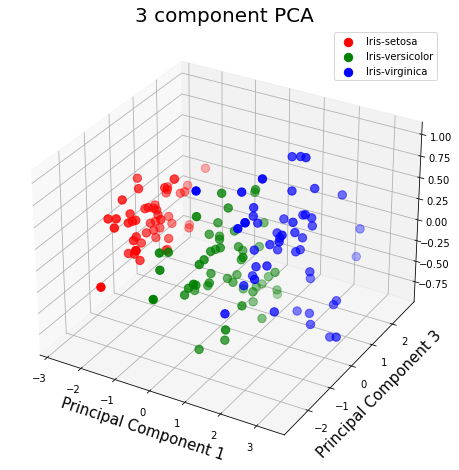

In [135]:
from sklearn.decomposition import PCA
import random
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
prici_df=pd.DataFrame(data=x_pca,columns=['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([prici_df, df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 70)
ax.legend(targets)
ax.grid()
plt.show()                      